In [5]:
import urllib.request
import re
import json
import requests
import ast
import pandas as pd
from datetime import timedelta

import time
import pandas as pd
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import warnings

from datetime import datetime
from datetime import timedelta
from datetime import date
import math
import re
import dataframe_image as dfi
import seaborn as sns
import dateutil.relativedelta
from io import BytesIO
import win32clipboard
from PIL import Image
import sys
import cv2
import schedule
import locale
import zipfile
import chromedriver_autoinstaller
import io
from io import StringIO
from PIL import Image, ImageOps

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.service import Service
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.action_chains import ActionChains
from selenium.common.exceptions import NoSuchElementException 
from selenium.webdriver.common.keys import Keys

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
def run():
    
    for i in range(0,30):
        while True:
            try:
                today = pd.Timestamp('today').floor('D')
                #today = datetime(2022, 7, 24)
                yesterday = today - timedelta(days=1)
                past_two_days = today - timedelta(days=2)
                past_nine_days = today - timedelta(days=10)
                yesterday_excel = yesterday.strftime('%Y-%m-%d')
                past_one_days_report = yesterday.strftime('%d-%m-%y')
                past_two_days_report = past_two_days.strftime('%d-%m-%y')
                
                
                first_day_of_month = yesterday.replace(day=1)

                day_of_last_month = yesterday - dateutil.relativedelta.relativedelta(months=1)

                yesterday_date_date = yesterday.strftime("%d")

                try:

                    day_of_last_month = day_of_last_month.replace(day=int(yesterday_date_date))

                except:

                    day_of_last_month = day_of_last_month.replace(day=int(yesterday_date_date)-1)

                first_day_of_last_month = day_of_last_month.replace(day=1)

                first_day_of_month_str = first_day_of_month.strftime("%d %b")

                yesterday_date = yesterday.strftime("%d %b")

                day_of_last_month_str = day_of_last_month.strftime("%d %b")

                first_day_of_last_month_str = first_day_of_last_month.strftime("%d %b")

                html_file = urllib.request.urlopen("https://idsp.kupu.id/excel")
                mybytes = html_file.read()
                mystr = mybytes.decode("utf8")
                download_lists = re.findall("href=[\"\'](.*?)[\"\']", mystr)
                matching = [s for s in download_lists if 'daily' in s.lower() and 'user' in s.lower() and 'report' in s.lower() and 'zip' in s.lower()]
                link = 'https://idsp.kupu.id/excel/' + matching[0]
                
                
                a = urllib.request.urlretrieve(link)
                
                s = requests.Session()
 
                res_login_man = s.get(link)

                man_byte = io.BytesIO(res_login_man.content)

                zf = zipfile.ZipFile(man_byte, "r")
            
                zip_file = zf.read(zf.namelist()[0])
                
                zip_string =str(zip_file,'utf-8')

                data_report = StringIO(zip_string) 

                daily_report = pd.read_csv(data_report)

                if yesterday_excel in daily_report['op_day'].values:
                    s = requests.Session()
                    payload_login = {"username":"adela.chandra@dalligent.com","password":"Indoindo8!"}
                    res_login = s.post('https://hq1.appsflyer.com/auth/login', json = payload_login )
                    payload_android = {"start_date":yesterday_excel ,"end_date":yesterday_excel ,
                                       "kpis":["installs"],"groupings":["attribution_type"],
                                       "filters":{"media_source":["shareit_int","googleadwords_int","mobavenue2_int","collectcentagency"
                                                                  ,"Facebook Ads","adaindonesia","mediadonuts","pokktmkt","mobavenue_int"
                                                                  ,"xapads_int","organic","Social_instagram","Social_facebook"],
                                       "app_id":["com.qiyee.recruit"]},"exclusions":{},"limit":50,"sort_by":[["installs","desc"]],"is_primary_inapps":True,"get_complementary_data":False}
                    
                    res_android = s.post('https://hq1.appsflyer.com/unified/data?widget=unified_attributions_by_type', json = payload_android )

                    respond_android = res_android.text

                    respond_dict_android = ast.literal_eval(respond_android)
                    android_installs_num = respond_dict_android["data"][0]['installs']
                    payload_ios = {"start_date":yesterday_excel,"end_date":yesterday_excel ,
                                   "kpis":["installs"],"groupings":["attribution_type"],
                                   "filters":{"media_source":["shareit_int","googleadwords_int","mobavenue2_int","collectcentagency",
                                                              "Facebook Ads","adaindonesia","mediadonuts","pokktmkt","mobavenue_int",
                                                              "xapads_int","organic","Social_instagram","Social_facebook"],
                                   "app_id":["id1598099029"]},"exclusions":{},"limit":50,"sort_by":[["installs","desc"]],"is_primary_inapps":True,"get_complementary_data":False}

                    res_ios = s.post('https://hq1.appsflyer.com/unified/data?widget=unified_attributions_by_type', json = payload_ios )

                    respond_ios = res_ios.text

                    respond_dict_ios = ast.literal_eval(respond_ios)

                    ios_installs_num = respond_dict_ios["data"][0]['installs']

                    data = {'KEY': ['INSTALLS', 'INSTALLS', 'INSTALLS', 'INSTALLS', 'KUPU USERS', 'KUPU USERS','KUPU USERS', 'KUPU USERS', 'KUPU USERS', 
                                'JOB PROVIDERS', 'JOB PROVIDERS', 'JOB PROVIDERS', 'JOB PROVIDERS', 'JOB PROVIDERS', 'JOB PROVIDERS', 'JOB PROVIDERS', 'JOB PROVIDERS', 'JOB PROVIDERS',
                                'JOB SEEKERS', 'JOB SEEKERS', 'JOB SEEKERS', 'JOB SEEKERS', 'JOB SEEKERS', 'JOB SEEKERS', 'JOB SEEKERS', 'JOB SEEKERS', 'JOB SEEKERS'] , 

                        'METRICS': ['Total Installs','Android Installs','iOS Installs',	'New Installs',	'Total Registered Users','New Registered Users','New Guest Mode Users'
                                    ,'Total Verified Users','New Verified Users','Total Registered JP',	'New Registered JP','With Agent Code','Without Agent Code','Total Job Posts'
                                    ,'New Job Posts','Total Job Offers','New Job Offers','Total Offers Accepted','New Offers Accepted',	'Total Registered JS','New Registered JS'
                                    ,'With Agent Code','Without Agent Code','Total JS Accept Interview','New JS Accept Interview','JS Take Academy Course','JS Get Badge'],


                       'UNIT' : ['Cumulative','Daily New Adds','Daily New Adds','Daily New Adds','Cumulative','Daily New Adds','Daily New Adds','Cumulative','Daily New Adds','Cumulative',
                                'Daily New Adds','Daily New Adds','Daily New Adds','Cumulative','Daily New Adds','Cumulative','Daily New Adds','Cumulative','Daily New Adds','Cumulative',
                                'Daily New Adds','Daily New Adds','Daily New Adds','Cumulative','Daily New Adds','Daily New Adds','Daily New Adds']} 

                    row_names = pd.DataFrame(data)  

                    daily_report['op_day'] = pd.to_datetime(daily_report['op_day'], format='%Y-%m-%d')



                    daily_report_week = daily_report.loc[(daily_report['op_day'] > past_nine_days ) & (daily_report['op_day'] < today)]
                    daily_report_week = daily_report_week.reset_index(drop=True)

                    daily_report_week['op_day'] = daily_report_week['op_day'].dt.strftime('%a, %d %b')

                    daily_report_week_transposed = daily_report_week.T.reset_index(drop=True)

                    new_header = daily_report_week_transposed.iloc[0] 
                    daily_report_week_transposed = daily_report_week_transposed[1:] 
                    daily_report_week_transposed.columns = new_header 

                    daily_report_week_transposed = daily_report_week_transposed.reset_index(drop=True)

                    appsflyer_data = read_csv('Appsflyer Data.csv')

                    appsflyer_data[past_one_days_report] = [ appsflyer_data[past_two_days_report][0] + android_installs_num , 
                                                             android_installs_num, 
                                                             ios_installs_num,
                                                             ios_installs_num + android_installs_num ]
                    appsflyer_data.to_csv('Appsflyer Data.csv', index = False)
                    appsflyer_data_trans = appsflyer_data.set_index('Date').T
                    appsflyer_data_trans = appsflyer_data_trans.rename_axis('Date').reset_index()
                    appsflyer_data_trans.columns.name = None
                    appsflyer_data_trans['Date'] = pd.to_datetime(appsflyer_data_trans['Date'], format='%d-%m-%y')
                    daily_report_week = appsflyer_data_trans.loc[(appsflyer_data_trans['Date'] > past_nine_days ) & (appsflyer_data_trans['Date'] < today)]
                    daily_report_week = daily_report_week.reset_index(drop=True)
                    daily_report_week['Date'] = daily_report_week['Date'].dt.strftime('%a, %d %b')
                    daily_report_week_trans = daily_report_week.set_index('Date').T.reset_index(drop = True)
                    daily_report_week_trans.columns.name = None
                    df_all_rows = pd.concat([ daily_report_week_trans, daily_report_week_transposed])
                    df_all_rows = df_all_rows.reset_index(drop = True)
                    daily_report_df = pd.concat([row_names, df_all_rows], axis=1)

                    daily_report_df.to_csv('Daily Report ' + str(past_one_days_report) + '.csv', index = False)

                    appsflyer_data_trans_nocum = appsflyer_data_trans.drop(columns=['Total Installs'])

                    appsflyer_this_month = appsflyer_data_trans_nocum.loc[(appsflyer_data_trans_nocum['Date'] >= first_day_of_month ) & (appsflyer_data_trans_nocum['Date'] <= yesterday)]

                    appsflyer_last_month = appsflyer_data_trans_nocum.loc[(appsflyer_data_trans_nocum['Date'] >= first_day_of_last_month ) & (appsflyer_data_trans_nocum['Date'] <= day_of_last_month)]

                    daily_report_filter = daily_report[daily_report.columns.drop(list(daily_report.filter(regex='cum')))]

                    daily_report_filter_month = daily_report_filter.loc[(daily_report_filter['op_day'] >= first_day_of_month ) & (daily_report_filter['op_day'] <= yesterday)]

                    daily_report_filter_month = daily_report_filter_month.reset_index(drop=True)

                    daily_report_filter_last_month = daily_report_filter.loc[(daily_report_filter['op_day'] >= first_day_of_last_month ) & (daily_report_filter['op_day'] <= day_of_last_month)]

                    daily_report_filter_last_month = daily_report_filter_last_month.reset_index(drop=True)

                    last_month_filter = pd.merge(appsflyer_last_month,daily_report_filter_last_month, left_on='Date',right_on='op_day')

                    last_month_filter = last_month_filter.drop(columns=['op_day'])

                    this_month_filter = pd.merge(appsflyer_this_month, daily_report_filter_month, left_on='Date',right_on='op_day')

                    this_month_filter = this_month_filter.drop(columns=['op_day'])

                    this_month_sum = this_month_filter.sum(numeric_only= True)

                    this_month_sum_list = this_month_sum.tolist()

                    last_month_sum = last_month_filter.sum(numeric_only= True)

                    last_month_sum_list = last_month_sum.tolist()

                    df_today = daily_report_df

                    df_today.rename(columns = {'KEY':'', 'METRICS':'KEY METRICS' , 'UNIT' : 'UNIT' }, inplace = True)

                    wechat_df = df_today.copy()
                    
                    wechat_df = wechat_df.fillna(0)

                    wechat_df.iloc[:,3:] =  wechat_df.iloc[:,3:].astype(int)

                    for i in wechat_df:
                        try:
                            wechat_df[i] = wechat_df[i].map("{:,}".format)
                        except:
                            continue

                    wechat_df[' '] = ''

                    changed_row =  wechat_df



                    wechat_df_indexed = changed_row.set_index(['', ' '])
                    wechat_df_indexed = wechat_df_indexed.style.set_table_styles([
                            {"selector": "th", "props": [("text-align", "center")]},
                            {"selector": "td", "props": [("text-align", "left")]}])

                    dfi.export(wechat_df_indexed,"Table.png")

                    new_df = df_today.copy()

                    new_df = new_df.drop(new_df[new_df['UNIT'] == 'Cumulative'].index)
                    new_df = new_df.drop(columns=['UNIT'])
                    new_df = new_df.reset_index(drop=True)

                    new_df['MTD (' + first_day_of_month_str + '-' + yesterday_date + ')' ] = this_month_sum_list
                    new_df['LMTD (' + first_day_of_last_month_str + '-' + day_of_last_month_str + ')' ] = last_month_sum_list
                    new_df = new_df.fillna(0)
                    new_df.iloc[:,2:] =  new_df.iloc[:,2:].astype(int)
                    
                    

                    growth_list = []

                    for index, row in new_df.iterrows():
                        if row['LMTD (' + first_day_of_last_month_str + '-' + day_of_last_month_str + ')'] == 0:
                            growth_list.append(str(0))
                        else:
                            growth_list.append(str(round(row['MTD (' + first_day_of_month_str + '-' + yesterday_date + ')'] / row['LMTD (' + first_day_of_last_month_str + '-' + day_of_last_month_str + ')'] *100 -100, 2)) + '%')

                    new_df['Growth (%)'] = growth_list

                    new_df_display = new_df.copy()
                    new_df_display[' '] = ''
                    for i in new_df_display:
                        try:
                            new_df_display[i] = new_df_display[i].map("{:,}".format)
                        except:
                            continue
                    new_df_display_indexed = new_df_display.set_index(['', ' '])
                    new_df_display_indexed = new_df_display_indexed.style.set_table_styles([
                            {"selector": "th", "props": [("text-align", "left")]},
                            {"selector": "td", "props": [("text-align", "left")]}])
                    dfi.export(new_df_display_indexed,"New Table.png")
                    
                                        # Open image
                    im = Image.open('New Table.png')

                    # Add border and save
                    bordered = ImageOps.expand(im, border=20, fill=(255,255,255))

                    bordered.save('New Table.png')

                    daily_report['op_day'] = pd.to_datetime(daily_report['op_day'], format='%Y-%m-%d')

                    graph_data_append = appsflyer_data_trans.loc[(appsflyer_data_trans['Date'] > day_of_last_month ) & (appsflyer_data_trans['Date'] < today)]

                    graph_data_append = graph_data_append.copy()

                    graph_data_append['Date'] = graph_data_append['Date'].dt.strftime('%d %b %y')

                    sns.set(rc={'figure.figsize':(6,5)})

                    ax1 = sns.barplot(
                        x='Date', 
                        y='Total Installs', 

                        data=graph_data_append, 
                        alpha=0.2, 
                        color='blue'
                    )
                    ax1.set_ylabel('Total No. of Installs')
                    ax1.legend(['Total Installs'], loc="upper left")
                    ax1.tick_params(axis='x', rotation=90)
                    # set up the 2nd axis
                    ax2 = ax1.twinx()
                    # plot bar graph on axis #2
                    sns.lineplot(
                        x='Date', 
                        y='New Installs', 
                        data=graph_data_append, 
                        sort=False, 
                        alpha=1, 
                        color='red', 
                        ax = ax2       # Pre-existing axes for the plot
                    ).set(title='No. of Installs')

                    ax2.set_ylabel('New No. of Installs')
                    ax2.legend(['New Installs'], loc="upper right")
                    plt.savefig('Installs.png', bbox_inches = 'tight', pad_inches = 0.2)

                    plt.show()

                    daily_report_month = daily_report.loc[(daily_report['op_day'] > day_of_last_month ) & (daily_report['op_day'] < today)]

                    daily_report_month_date = daily_report_month.copy()

                    daily_report_month_date['op_day'] = daily_report_month_date['op_day'].dt.strftime('%d %b %y')
                    
                    daily_report_month_date['Date'] = daily_report_month_date['op_day'] 

                    sns.set(rc={'figure.figsize':(6,5)})

                    ax1 = sns.barplot(
                        x='Date', 
                        y='sign_up_cum', 

                        data=daily_report_month_date, 
                        alpha=0.2, 
                        color='blue'
                    )
                    ax1.set_ylabel('Total No. of Registered Users')
                    ax1.legend(['Total Registered Users'], loc="upper left")
                    ax1.tick_params(axis='x', rotation=90)
                    # set up the 2nd axis
                    ax2 = ax1.twinx()
                    # plot bar graph on axis #2
                    sns.lineplot(
                        x='Date', 
                        y='sign_up', 
                        data=daily_report_month_date, 
                        sort=False, 
                        alpha=1, 
                        color='red', 
                        ax = ax2       # Pre-existing axes for the plot
                    ).set(title='No. of Registered Users')

                    ax2.set_ylabel('New No. of Registered Users')
                    ax2.legend(['New Registered Users'], loc="upper right")
                    plt.savefig('registered_users.png', bbox_inches = 'tight', pad_inches = 0.2)

                    plt.show()

                    sns.set(rc={'figure.figsize':(6,5)})

                    ax1 = sns.barplot(
                        x='Date', 
                        y='sign_up_prov_cum', 

                        data=daily_report_month_date, 
                        alpha=0.2, 
                        color='blue'
                    )
                    ax1.set_ylabel('Total No. of Registered JP')
                    ax1.legend(['Total Registered JP'], loc="upper left")
                    ax1.tick_params(axis='x', rotation=90)
                    # set up the 2nd axis
                    ax2 = ax1.twinx()
                    # plot bar graph on axis #2
                    sns.lineplot(
                        x='Date', 
                        y='sign_up_prov', 
                        data=daily_report_month_date, 
                        sort=False, 
                        alpha=1, 
                        color='red', 
                        ax = ax2       # Pre-existing axes for the plot
                    ).set(title='No. of Registered Job Providers')

                    ax2.set_ylabel('New No. of Registered JP')
                    ax2.legend(['New Registered JP'], loc="upper right")
                    plt.savefig('registered_jp.png', bbox_inches = 'tight', pad_inches = 0.2)

                    plt.show() 

                    sns.set(rc={'figure.figsize':(6,5)})

                    ax1 = sns.barplot(
                        x='Date', 
                        y='sign_up_seek_cum', 

                        data=daily_report_month_date, 
                        alpha=0.2, 
                        color='blue'
                    )
                    ax1.set_ylabel('Total No. of Registered JS')
                    ax1.legend(['Total Registered JS'], loc="upper left")
                    ax1.tick_params(axis='x', rotation=90)
                    # set up the 2nd axis
                    ax2 = ax1.twinx()
                    # plot bar graph on axis #2
                    sns.lineplot(
                        x='Date', 
                        y='sign_up_seek', 
                        data=daily_report_month_date, 
                        sort=False, 
                        alpha=1, 
                        color='red', 
                        ax = ax2       # Pre-existing axes for the plot
                    ).set(title='No. of Registered Job Seekers')

                    ax2.set_ylabel('New No. of Registered JS')
                    ax2.legend(['New Registered JS'], loc="upper right")
                    plt.savefig('registered_js.png', bbox_inches = 'tight', pad_inches = 0.2)

                    plt.show()

                    images = [Image.open(x) for x in ['Installs.png', 'registered_users.png']]
                    widths, heights = zip(*(i.size for i in images))

                    total_width = sum(widths)
                    max_height = max(heights)

                    new_im = Image.new('RGB', (total_width, max_height))

                    x_offset = 0
                    for im in images:
                        new_im.paste(im, (x_offset,0))
                        x_offset += im.size[0]

                    new_im.save('image_one.png')

                    images = [Image.open(x) for x in ['registered_jp.png', 'registered_js.png']]
                    widths, heights = zip(*(i.size for i in images))

                    total_width = sum(widths)
                    max_height = max(heights)

                    new_im2 = Image.new('RGB', (total_width, max_height))

                    x_offset = 0
                    for im in images:
                        new_im2.paste(im, (x_offset,0))
                        x_offset += im.size[0]

                    new_im2.save('image_two.png')

                    daily_report_today = daily_report.loc[daily_report['op_day'] == yesterday].reset_index(drop = True)

                    installs_df = pd.DataFrame()

                    installs_header = {'Installs': 'Installs', '': 'Total', ' ': 'New'}

                    installs_data = {'Installs': 'Installs', '': f"{ int(appsflyer_data[past_one_days_report][0]) :,}", ' ': f"{ int(appsflyer_data[past_one_days_report][3]):,}" }

                    installs_df = installs_df.append(installs_header, ignore_index = True)

                    installs_df = installs_df.append(installs_data, ignore_index = True)

                    installs_df['     '] = ''

                    installs_df = installs_df.set_index(['Installs', '     '])

                    installs_df = installs_df.style.set_table_styles([
                                {"selector": "th", "props": [("text-align", "center")]},
                                {"selector": "td", "props": [("text-align", "center")]}])

                    dfi.export(installs_df,"installs_dataframe.png")

                    users_df = pd.DataFrame()


                    users_header = {'Users': 'Registered' ,' ': 'Total', '  ': 'New'}

                    users_data = {'Users': 'Registered', ' ': f"{ int(daily_report_today['sign_up_cum'][0]) :,}", '  ': f"{int(daily_report_today['sign_up'][0]):,}" }

                    users_df = users_df.append(users_header, ignore_index = True)

                    users_df = users_df.append(users_data, ignore_index = True)

                    verified_header = {'Users': 'Verified' ,' ': 'Total', '  ': 'New'}

                    verified_data = {'Users': 'Verified', ' ': f"{int(daily_report_today['verified_cum'][0]):,}" , '  ': f"{int(daily_report_today['verified'][0]):,}"  }

                    users_df = users_df.append(verified_header, ignore_index = True)

                    users_df = users_df.append(verified_data, ignore_index = True)

                    users_df['    '] = ''

                    users_df = users_df .set_index(['Users', '    '])

                    users_df = users_df.style.set_table_styles([
                            {"selector": "th", "props": [("text-align", "center")]},
                            {"selector": "td", "props": [("text-align", "center")]}])

                    dfi.export(users_df,"users_dataframe.png")

                    jp_df = pd.DataFrame()
                    
                    daily_report_today = daily_report_today.fillna(0)


                    jp_registered_header = {'Job Providers': 'Registered' ,' ': 'Total', '  ': 'New' }

                    jp_registered_data = {'Job Providers': 'Registered', ' ': f"{int(daily_report_today['sign_up_prov_cum'][0]):,}"  , '  ': f"{int(daily_report_today['sign_up_prov'][0]):,}"  }

                    jp_df = jp_df.append(jp_registered_header, ignore_index = True)

                    jp_df = jp_df.append(jp_registered_data, ignore_index = True)

                    jp_posts_header = {'Job Providers': 'Job Posts' ,' ': 'Total', '  ': 'New' }

                    jp_posts_data = {'Job Providers': 'Job Posts', ' ': f"{int(daily_report_today['post_job_prov_cum'][0]):,}"  , '  ': f"{int(daily_report_today['post_job_prov'][0]):,}" }

                    jp_df = jp_df.append(jp_posts_header, ignore_index = True)

                    jp_df = jp_df.append(jp_posts_data, ignore_index = True)

                    jp_offers_header = {'Job Providers': 'Job Offer' ,' ': 'Total', '  ': 'New' }

                    jp_offers_data = {'Job Providers': 'Job Offer', ' ': f"{int(daily_report_today['offer_cum'][0]):,}"  , '  ': f"{int(daily_report_today['offer'][0]):,}" }

                    jp_df = jp_df.append(jp_offers_header, ignore_index = True)

                    jp_df = jp_df.append(jp_offers_data, ignore_index = True)

                    jp_offer_accept_header = {'Job Providers': 'Offer Accepted' ,' ': 'Total', '  ': 'New'}

                    jp_offer_accept_data = {'Job Providers': 'Offer Accepted', ' ': f"{int(daily_report_today['accept_cum'][0]):,}"  , '  ': f"{int(daily_report_today['accept'][0]):,}"  }

                    jp_df = jp_df.append(jp_offer_accept_header, ignore_index = True)

                    jp_df = jp_df.append(jp_offer_accept_data, ignore_index = True)

                    jp_df['    '] = ''

                    jp_df = jp_df.set_index(['Job Providers', '    '])


                    jp_df = jp_df.style.set_table_styles([
                            {"selector": "th", "props": [("text-align", "center")]},
                            {"selector": "td", "props": [("text-align", "center")]}])

                    dfi.export(jp_df,"jp_dataframe.png")

                    js_df = pd.DataFrame()

                    js_header = {'Job Seekers': 'Registered' ,' ': 'Total', '  ': 'New'}

                    js_data = {'Job Seekers': 'Registered', ' ': f"{int(daily_report_today['sign_up_seek_cum'][0]):,}"  , '  ': f"{int(daily_report_today['sign_up_seek'][0]):,}"  }

                    js_df = js_df.append(js_header, ignore_index = True)

                    js_df = js_df.append(js_data, ignore_index = True)

                    js_accept_header = {'Job Seekers': 'Accept Interview' ,' ': 'Total', '  ': 'New' }

                    js_accept_data = {'Job Seekers': 'Accept Interview', ' ': f"{int(daily_report_today['accept_int_seek_cum'][0]):,}"  , '  ': f"{int(daily_report_today['accept_int_seek'][0]):,}" }

                    js_df = js_df.append(js_accept_header, ignore_index = True)

                    js_df = js_df.append(js_accept_data, ignore_index = True)

                    js_df['    '] = ''

                    js_df = js_df .set_index(['Job Seekers', '    '])

                    js_df = js_df .style.set_table_styles([
                            {"selector": "th", "props": [("text-align", "center")]},
                            {"selector": "td", "props": [("text-align", "center")]}])

                    dfi.export(js_df,"js_dataframe.png")


                    img_1 = cv2.imread('installs_dataframe.png')
                    img_2 = cv2.imread('users_dataframe.png')

                    h1, w1 = img_1.shape[:2]
                    h2, w2 = img_2.shape[:2]

                    img_3 = np.zeros((max(h1, h2), w1+w2,3), dtype=np.uint8)
                    img_3[:,:] = (255,255,255)

                    img_3[:h1, :w1,:3] = img_1
                    img_3[:h2, w1:w1+w2,:3] = img_2

                    img_4 = cv2.imread('js_dataframe.png')

                    h3, w3 = img_3.shape[:2]
                    h4, w4 = img_4.shape[:2]

                    img_5 = np.zeros((max(h3, h4), w3+w4,3), dtype=np.uint8)
                    img_5[:,:] = (255,255,255)

                    img_5[:h3, :w3,:3] = img_3
                    img_5[:h4, w3:w3+w4,:3] = img_4

                    img_6 = cv2.imread('jp_dataframe.png')

                    h5, w5 = img_5.shape[:2]
                    h6, w6 = img_6.shape[:2]

                    img_7 = np.zeros((max(h5, h6), w5+w6,3), dtype=np.uint8)
                    img_7[:,:] = (255,255,255)

                    img_7[:h5, :w5,:3] = img_5
                    img_7[:h6, w5:w5+w6,:3] = img_6

                    cv2.imwrite('image_three.png' ,img_7)
                    
                    # Open image
                    im = Image.open('image_three.png')

                    # Add border and save
                    bordered = ImageOps.expand(im, border=20, fill=(255,255,255))

                    bordered.save('image_three.png')
                    
                else:
                    print('No Data')
                
                break
                    
            except:
                print('Processing Error, retrying in 30s')
                time.sleep(30)
                
                continue

        break

#     for i in range(0,10):
#         while True:
#             try:
#                 path = chromedriver_autoinstaller.install() 

#                 chromeOptions = webdriver.ChromeOptions()
#                 chromeOptions.add_argument("--start-maximized")
#                 s = Service(path)
#                 driver = webdriver.Chrome(service=s, options=chromeOptions)

#                 driver.get("https://mail.dalligent.com/")

#                 WebDriverWait(driver, 60).until(EC.element_to_be_clickable((By.XPATH, "//input[@name='account_name']")))

#                 driver.find_element(By.XPATH, "//input[@name='account_name']").send_keys('irvin.andersen')

#                 driver.find_element(By.XPATH, "//input[@name='password']").send_keys('Indonesia2')

#                 driver.find_element(By.XPATH, "//input[@class='form-btn']").click()

#                 WebDriverWait(driver, 120).until(EC.element_to_be_clickable((By.XPATH, "//*[contains(text(),'写 信')]/..")))

#                 driver.find_element(By.XPATH, "//*[contains(text(),'写 信')]/..").click()

#                 WebDriverWait(driver, 60).until(EC.element_to_be_clickable((By.XPATH, "//div[@class='js-component-emailcontainer nui-multiLineIpt C-multiLineIpt nui-ipt']")))

#                 yesterday_mail = yesterday.strftime("%d/%m/%Y")

#                 driver.find_element(By.XPATH, "//input[contains(@id,'subjectInput')]").send_keys('Daily KUPU User Report ' + yesterday_mail)

#                 driver.find_element(By.XPATH, "//input[@class='nui-editableAddr-ipt']").send_keys('cuipeng@dalligent.com ')

#                 driver.find_element(By.XPATH, "//input[@class='nui-editableAddr-ipt']").send_keys('wongkk@dalligent.com ')

#                 driver.find_element(By.XPATH, "//input[@class='nui-editableAddr-ipt']").send_keys('andry.the@dalligent.com ')

#                 driver.find_element(By.XPATH, "//input[@class='nui-editableAddr-ipt']").send_keys('copper.quan@dalligent.com ')

#                 driver.find_element(By.XPATH, "//input[@class='nui-editableAddr-ipt']").send_keys('tannya.madrim@dalligent.com ')

#                 driver.find_element(By.XPATH, "//input[@class='nui-editableAddr-ipt']").send_keys('selo.wisnuaji@dalligent.com ')

#                 driver.find_element(By.XPATH, "//input[@class='nui-editableAddr-ipt']").send_keys('puspa.cahyono@dalligent.com ')

#                 driver.find_element(By.XPATH, "//input[@class='nui-editableAddr-ipt']").send_keys('hendi.kushandoko@dalligent.com ')

#                 driver.find_element(By.XPATH, "//input[@class='nui-editableAddr-ipt']").send_keys('tiara.marcellia@dalligent.com ')

#                 driver.find_element(By.XPATH, "//input[@class='nui-editableAddr-ipt']").send_keys('felicya.febrina@dalligent.com ')
                
#                 driver.find_element(By.XPATH, "//input[@class='nui-editableAddr-ipt']").send_keys('apriditia.ananda@dalligent.com ')
                
#                 driver.find_element(By.XPATH, "//input[@class='nui-editableAddr-ipt']").send_keys('addivia.karina@dalligent.com ')
                
#                 driver.find_element(By.XPATH, "//input[@class='nui-editableAddr-ipt']").send_keys('Willy.yulianto@dalligent.com ')

#                 driver.find_element(By.XPATH, "//input[@class='nui-editableAddr-ipt']").send_keys('adela.chandra@dalligent.com ')
                
#                 driver.find_element(By.XPATH, "//input[@class='nui-editableAddr-ipt']").send_keys('imania.anjani@dalligent.com ')
                
#                 driver.find_element(By.XPATH, "//input[@class='nui-editableAddr-ipt']").send_keys('masong@dalligent.com ')
                
#                 driver.find_element(By.XPATH, "//input[@class='nui-editableAddr-ipt']").send_keys('jiaojiao.yang@dalligent.com ')
                
#                 driver.find_element(By.XPATH, "//input[@class='nui-editableAddr-ipt']").send_keys('yangtong@dalligent.com ')
                
#                 driver.find_element(By.XPATH, "//input[@class='nui-editableAddr-ipt']").send_keys('yanjun@dalligent.com ')
                
#                 driver.find_element(By.XPATH, "//input[@class='nui-editableAddr-ipt']").send_keys('tangxu@dalligent.com ')
                
#                 try:
#                     driver.find_element(By.XPATH, "//span[contains(text(),'我知道了')]").click()

#                 except:
#                     pass
                
#                 WebDriverWait(driver, 60).until(EC.element_to_be_clickable((By.XPATH, "//div[@class='APP-editor APP-editor-basic']")))
                
#                 driver.find_element(By.XPATH, "//div[@class='APP-editor APP-editor-basic']").click()

#                 driver.find_element(By.XPATH, "//b[@class='ico ico-editor ico-editor-image']").click()

#                 driver.find_element(By.XPATH, "//span[contains(text(),'浏览')]").click()

#                 driver.find_element(By.XPATH, "//input[@id='inputFileImage']").send_keys(os.getcwd()+"/image_three.png")

#                 driver.find_element(By.XPATH, "//b[@class='ico ico-editor ico-editor-image']").click()

#                 driver.find_element(By.XPATH, "//span[contains(text(),'浏览')]").click()

#                 driver.find_element(By.XPATH, "//input[@id='inputFileImage']").send_keys(os.getcwd()+"/New Table.png")

#                 driver.find_element(By.XPATH, "//b[@class='ico ico-editor ico-editor-image']").click()

#                 driver.find_element(By.XPATH, "//span[contains(text(),'浏览')]").click()

#                 driver.find_element(By.XPATH, "//input[@id='inputFileImage']").send_keys(os.getcwd()+"/image_one.png")

#                 driver.find_element(By.XPATH, "//b[@class='ico ico-editor ico-editor-image']").click()

#                 driver.find_element(By.XPATH, "//span[contains(text(),'浏览')]").click()

#                 driver.find_element(By.XPATH, "//input[@id='inputFileImage']").send_keys(os.getcwd()+"/image_two.png")

#                 WebDriverWait(driver, 60).until(EC.element_to_be_clickable((By.XPATH, "//span[text() = '存草稿']")))

#                 time.sleep(5)

#                 #driver.find_element(By.XPATH, "//span[text() = '存草稿']").click()

#                 time.sleep(10)
                
#                 break
                
#             except:
#                 print('Email 1 Error, retrying in 30s')
#                 time.sleep(30)
                
#                 continue

#         break
        
    for i in range(0,10):
        while True:
            try:
                path = chromedriver_autoinstaller.install() 

                chromeOptions = webdriver.ChromeOptions()
                chromeOptions.add_argument("--start-maximized")
                s = Service(path)
                driver = webdriver.Chrome(service=s, options=chromeOptions)

                driver.get("https://mail.dalligent.com/")

                WebDriverWait(driver, 60).until(EC.element_to_be_clickable((By.XPATH, "//input[@name='account_name']")))

                driver.find_element(By.XPATH, "//input[@name='account_name']").send_keys('irvin.andersen')

                driver.find_element(By.XPATH, "//input[@name='password']").send_keys('Indonesia2')

                driver.find_element(By.XPATH, "//input[@class='form-btn']").click()

                WebDriverWait(driver, 120).until(EC.element_to_be_clickable((By.XPATH, "//*[contains(text(),'写 信')]/..")))

                driver.find_element(By.XPATH, "//*[contains(text(),'写 信')]/..").click()

                WebDriverWait(driver, 60).until(EC.element_to_be_clickable((By.XPATH, "//div[@class='js-component-emailcontainer nui-multiLineIpt C-multiLineIpt nui-ipt']")))

                yesterday_mail = yesterday.strftime("%d/%m/%Y")

                driver.find_element(By.XPATH, "//input[contains(@id,'subjectInput')]").send_keys('Daily KUPU User Report Internal ' + yesterday_mail)
      
                driver.find_element(By.XPATH, "//input[@class='nui-editableAddr-ipt']").send_keys('adela.chandra@dalligent.com ')  
                
                driver.find_element(By.XPATH, "//input[@class='nui-editableAddr-ipt']").send_keys('wongkk@dalligent.com ')
                
                driver.find_element(By.XPATH, "//input[@class='nui-editableAddr-ipt']").send_keys('andry.the@dalligent.com ')
                
                driver.find_element(By.XPATH, "//input[@class='nui-editableAddr-ipt']").send_keys('felicya.febrina@dalligent.com ')

                
                try:
                    driver.find_element(By.XPATH, "//span[contains(text(),'我知道了')]").click()

                except:
                    pass
                
                WebDriverWait(driver, 60).until(EC.element_to_be_clickable((By.XPATH, "//div[@class='APP-editor APP-editor-basic']")))
                
                driver.find_element(By.XPATH, "//div[@class='APP-editor APP-editor-basic']").click()

                driver.find_element(By.XPATH, "//b[@class='ico ico-editor ico-editor-image']").click()

                driver.find_element(By.XPATH, "//span[contains(text(),'浏览')]").click()

                driver.find_element(By.XPATH, "//input[@id='inputFileImage']").send_keys(os.getcwd()+"/image_three.png")

                driver.find_element(By.XPATH, "//b[@class='ico ico-editor ico-editor-image']").click()

                driver.find_element(By.XPATH, "//span[contains(text(),'浏览')]").click()

                driver.find_element(By.XPATH, "//input[@id='inputFileImage']").send_keys(os.getcwd()+"/New Table.png")

                driver.find_element(By.XPATH, "//b[@class='ico ico-editor ico-editor-image']").click()

                driver.find_element(By.XPATH, "//span[contains(text(),'浏览')]").click()

                driver.find_element(By.XPATH, "//input[@id='inputFileImage']").send_keys(os.getcwd()+"/image_one.png")

                driver.find_element(By.XPATH, "//b[@class='ico ico-editor ico-editor-image']").click()

                driver.find_element(By.XPATH, "//span[contains(text(),'浏览')]").click()

                driver.find_element(By.XPATH, "//input[@id='inputFileImage']").send_keys(os.getcwd()+"/image_two.png")
                
                driver.find_element(By.XPATH, "//b[@class='ico ico-editor ico-editor-image']").click()

                driver.find_element(By.XPATH, "//span[contains(text(),'浏览')]").click()

                driver.find_element(By.XPATH, "//input[@id='inputFileImage']").send_keys(os.getcwd()+"/Table.png")

                WebDriverWait(driver, 60).until(EC.element_to_be_clickable((By.XPATH, "//span[text() = '发送']")))

                time.sleep(5)

                driver.find_element(By.XPATH, "//span[text() = '发送']").click()

                time.sleep(300)
                
                break
                
            except:
                print('Email Test Error, retrying in 30s')
                time.sleep(30)
                
                continue

        break

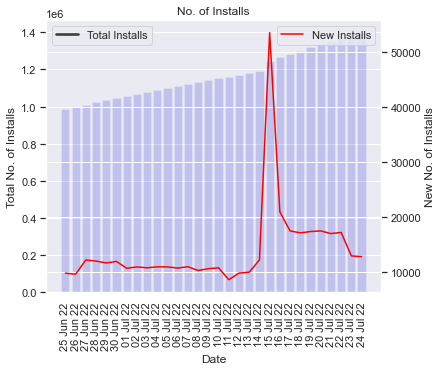

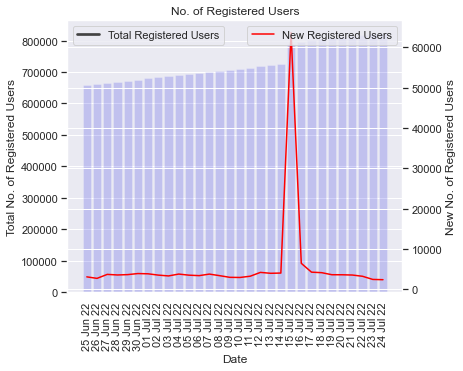

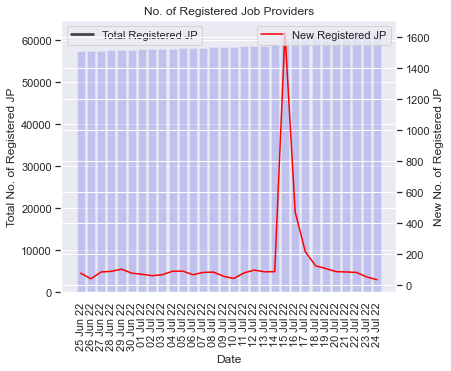

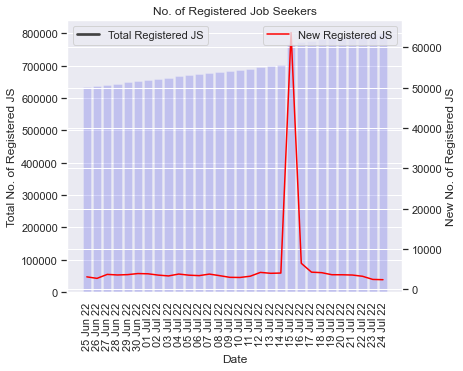

In [8]:
run()

In [9]:
schedule.every().day.at("07:20").do(run)

Every 1 day at 07:20:00 do run() (last run: [never], next run: 2022-07-26 07:20:00)

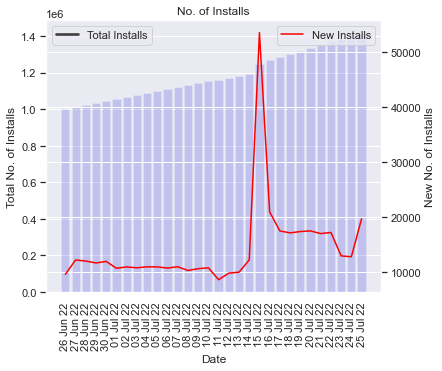

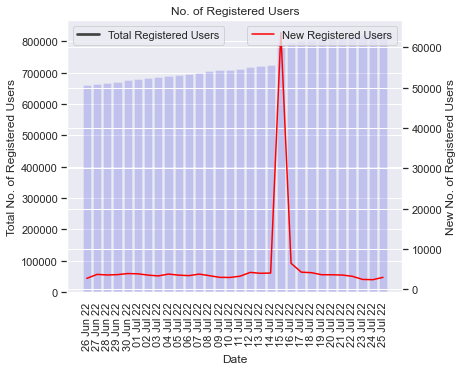

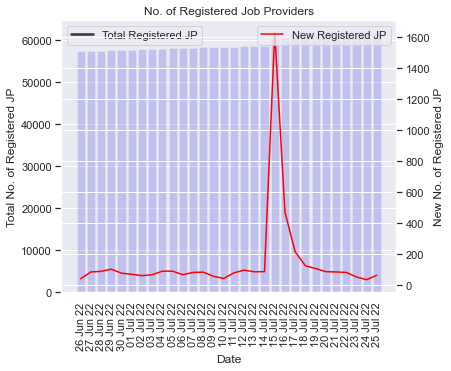

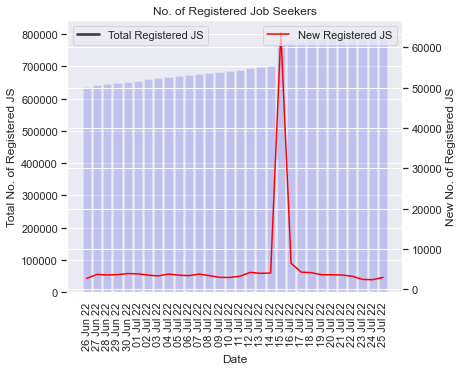

In [ ]:
while True:
    schedule.run_pending()
    time.sleep(60) # wait one minute